In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

```
CRIM：城镇的人均犯罪率
ZN：大于25,000平方英尺的地块的住宅用地比例。
INDUS：每个镇的非零售业务英亩的比例。
CHAS：查尔斯河虚拟变量（如果环河，则等于1；否则等于0）
NOX：一氧化氮的浓度（百万分之几）
RM：每个住宅的平均房间数
AGE：1940年之前建造的自有住房的比例
DIS：到五个波士顿就业中心的加权距离
RAD：径向公路通达性的指标
TAX：每$ 10,000的全值财产税率
PTRATIO：各镇的师生比率
B：计算方法为1000（Bk-0.63）²，其中Bk是按城镇划分的非裔美国人的比例
LSTAT：底层人口的百分比
MEDV：自有住房数的中位数，单位为$ 1000
```

In [230]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df = pd.read_csv('housing.csv', names=columns, delimiter=r'\s+', header=None)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [231]:
# 数据形状
df.shape

(506, 14)

In [232]:
# 观察数据分布
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [233]:
# 观察缺失值
df.notnull().sum()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
MEDV       506
dtype: int64

/usr/local/miniconda3/envs/jupyter/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

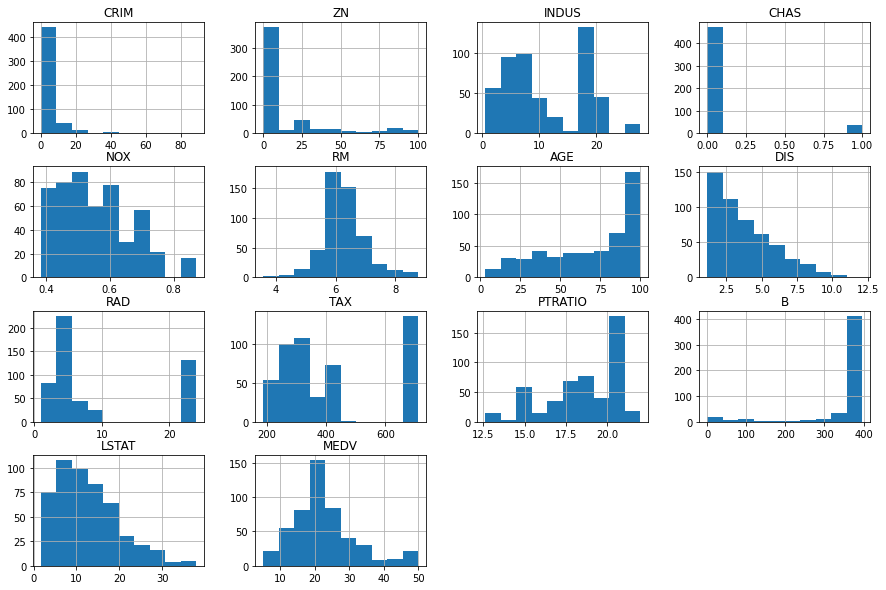

In [234]:
# 每个特征的直方图
df.hist(figsize=(15,10))

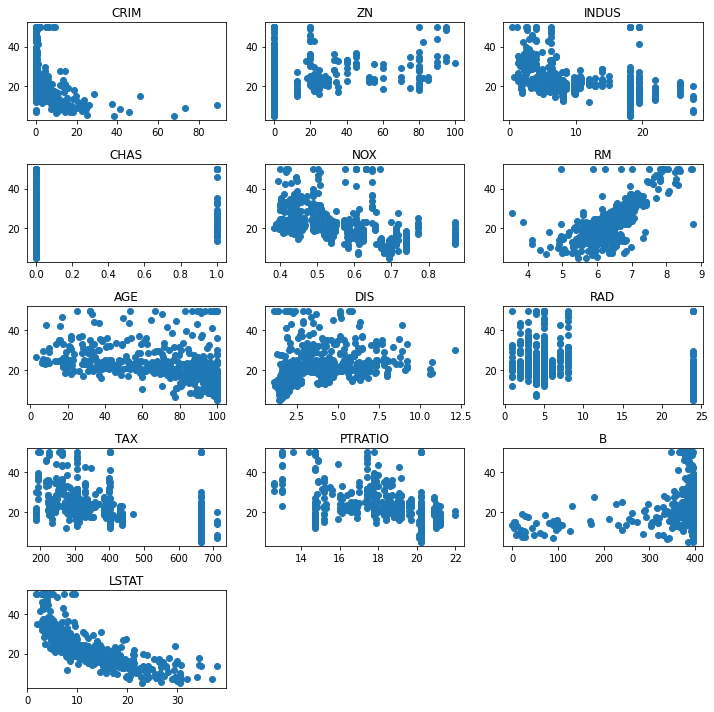

In [235]:
# 可视化：特征与房价之间的相关性（13个特征与房价之间的关系图，每行画3个）
cols = 3
rows = math.ceil(13 / 3)
plt.figure(figsize=(10,10),)
for idx in range(13):
    plt.subplot(rows,cols,idx+1)
    plt.scatter(df[columns[idx]], df['MEDV'])
    plt.title(columns[idx])
plt.tight_layout() # 自动适配子图间距

<AxesSubplot:>

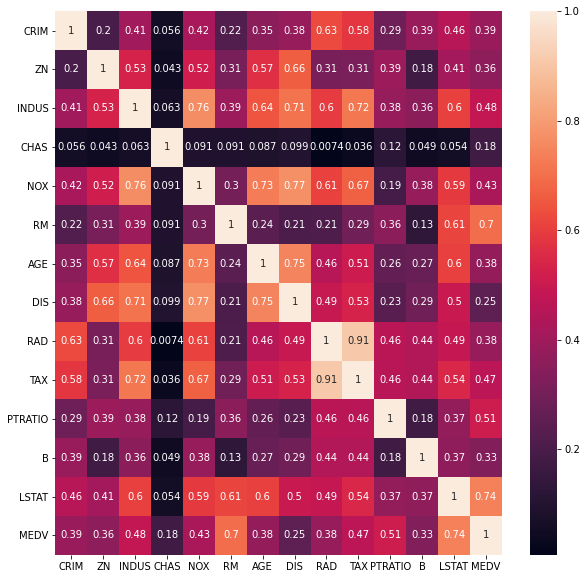

In [236]:
# 可视化： 特征间相关系数（-1~1之间，1为强正相关，-1为强负相关）
# RM,LSTAT,PTRATIO与MEDV特征相关性较高
corr = df.corr().abs()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [243]:
# 训练回归模型，使用RM与LSTAT这两个与MEDV相关性高的特征
theta = np.random.rand(3,)

# 线性函数
def f(x):
    return np.dot(theta,x.T)

# 评估函数
def mse(x,y):
    return np.sum((f(x)-y)**2)/len(y)

In [245]:
# 训练
learning_rate = 1e-3

train_x = df[['RM','LSTAT']]
train_x = (train_x-train_x.mean()) / train_x.std() # 标准化
train_x = np.insert(train_x.to_numpy(), 0, 1, axis=1) # 为常数项theta_0对应输入1
train_y = df['MEDV']

for i in range(50):
    theta = theta - learning_rate * np.dot(f(train_x)-train_y,train_x)
    metrics = mse(train_x, train_y)
    print('第%d轮 均方误差%.04f theta%s' % (i+1, metrics, str(theta)))

第1轮 均方误差30.5125 theta[22.53280632  3.57970178 -4.58710398]
第2轮 均方误差30.5125 theta[22.53280632  3.57969858 -4.58710718]
第3轮 均方误差30.5125 theta[22.53280632  3.579696   -4.58710975]
第4轮 均方误差30.5125 theta[22.53280632  3.57969393 -4.58711182]
第5轮 均方误差30.5125 theta[22.53280632  3.57969226 -4.58711349]
第6轮 均方误差30.5125 theta[22.53280632  3.57969092 -4.58711484]
第7轮 均方误差30.5125 theta[22.53280632  3.57968984 -4.58711592]
第8轮 均方误差30.5125 theta[22.53280632  3.57968897 -4.58711679]
第9轮 均方误差30.5125 theta[22.53280632  3.57968827 -4.58711749]
第10轮 均方误差30.5125 theta[22.53280632  3.57968771 -4.58711805]
第11轮 均方误差30.5125 theta[22.53280632  3.57968725 -4.5871185 ]
第12轮 均方误差30.5125 theta[22.53280632  3.57968689 -4.58711887]
第13轮 均方误差30.5125 theta[22.53280632  3.57968659 -4.58711916]
第14轮 均方误差30.5125 theta[22.53280632  3.57968636 -4.5871194 ]
第15轮 均方误差30.5125 theta[22.53280632  3.57968617 -4.58711959]
第16轮 均方误差30.5125 theta[22.53280632  3.57968601 -4.58711974]
第17轮 均方误差30.5125 theta[22.53280632  3.57968589 -4

<ipython-input-239-1635975f1174>:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


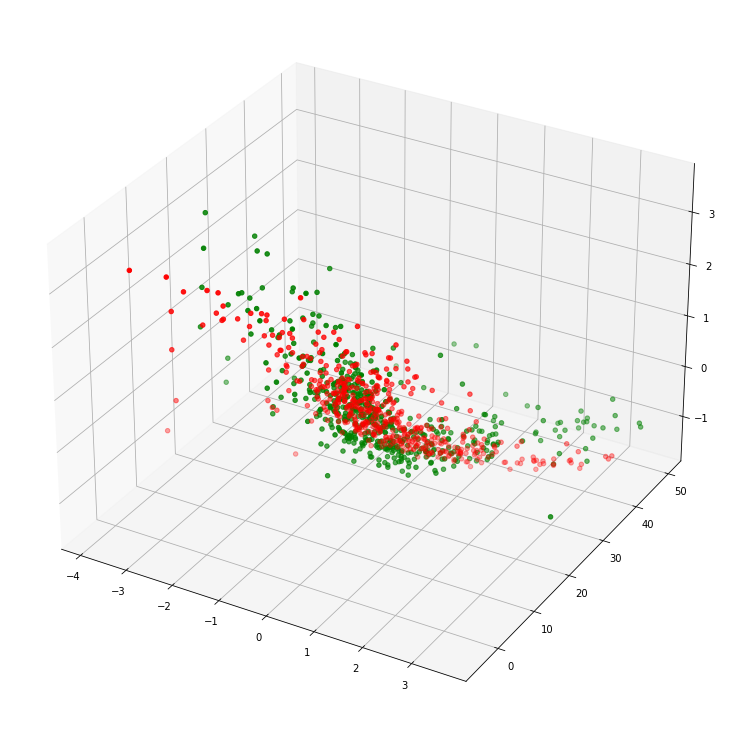

In [239]:
# 绘制3D结果
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.scatter(train_x[:,1],f(train_x),train_x[:,2], c='red')
ax.scatter(train_x[:,1],train_y,train_x[:,2], c='green')

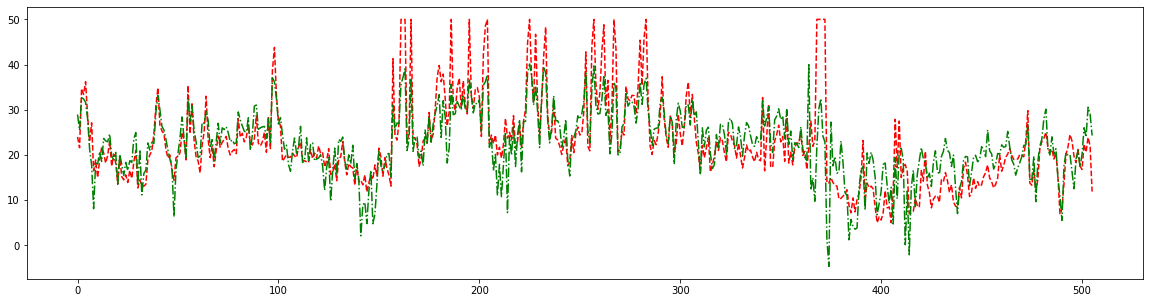

In [240]:
# 绘制3D结果：房价和预测房价的高度曲线
plt.figure(figsize=(20,5))
plt.plot(np.arange(0,train_x.shape[0]), train_y, c='red', linestyle='--')
plt.plot(np.arange(0,train_x.shape[0]), f(train_x), c='green', linestyle='-.')